In [17]:
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
data = pd.read_csv('wine.csv')

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregar e tratar dados
data = pd.read_csv('wine.csv')
data['alcohol'] = data['alcohol'].fillna(data['alcohol'].median())

# Normalização
scaler = StandardScaler()
X = data.drop(['class_label', 'class_name'], axis=1)
X_scaled = scaler.fit_transform(X)


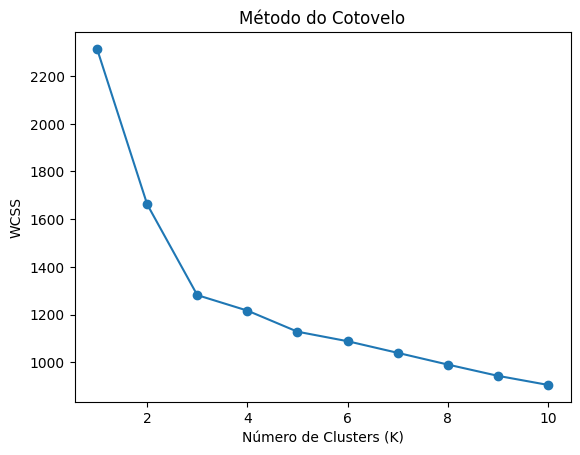

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tabela de contingência
cross_tab = pd.crosstab(data['class_name'], clusters, rownames=['Classe Real'], colnames=['Cluster'])
print(cross_tab)

Cluster       0   1   2
Classe Real            
Barbera       0  48   0
Barolo        0   0  59
Grignolino   64   3   4


In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.2f}")  
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, clusters):.2f}")  
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_scaled, clusters):.2f}")  

Silhouette Score: 0.28
Davies-Bouldin Index: 1.40
Calinski-Harabasz Index: 70.48


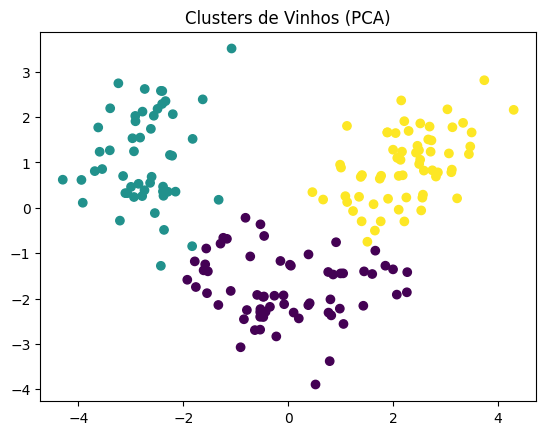

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Vinhos (PCA)')
plt.show()